In [1]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import pandas as pd
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.api as sm
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix


import statsmodels.api as sm
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tools.eval_measures import rmse
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('final_with_covid_AS.csv')


In [3]:
filtered_data = data[data['CarDriver'] == 1]
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12582 entries, 11 to 54025
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       12582 non-null  int64  
 1   BedDys           12582 non-null  int64  
 2   BeddystoCC       12582 non-null  float64
 3   Severity         12582 non-null  int64  
 4   DiedCases        12582 non-null  int64  
 5   DiedBdDys        12582 non-null  int64  
 6   Hsptlsns         12582 non-null  int64  
 7   April            12582 non-null  int64  
 8   August           12582 non-null  int64  
 9   December         12582 non-null  int64  
 10  February         12582 non-null  int64  
 11  January          12582 non-null  int64  
 12  July             12582 non-null  int64  
 13  June             12582 non-null  int64  
 14  March            12582 non-null  int64  
 15  May              12582 non-null  int64  
 16  November         12582 non-null  int64  
 17  October    

In [4]:
target = filtered_data['Hsptlsns'].shift(-1)

In [5]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import xgboost as xgb


import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd



X = filtered_data[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]


import statsmodels.api as sm
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd


# تقسیم داده‌ها به آموزش و تست
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

# تعریف مدل XGBoost
params = {
    'objective': 'count:poisson', # برای پواسون رگرسیون
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی با XGBoost
y_pred_xgb = xgb_model.predict(dtest)

# تعریف مدل پواسون رگرسیون با statsmodels
poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson()).fit()

# پیش‌بینی با پواسون رگرسیون
y_pred_poisson = poisson_model.predict(x_test)

# ترکیب پیش‌بینی‌ها
# می‌توانید وزن‌های مختلفی را امتحان کنید یا از یک مدل متا-لرنر استفاده کنید
y_pred_combined = (y_pred_xgb + y_pred_poisson) / 2


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [18:59:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# محاسبه خطای میانگین مربعات (MSE) و خطای میانگین مطلق (MAE)
mse = mean_squared_error(y_test, y_pred_combined)
mae = mean_absolute_error(y_test, y_pred_combined)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
from sklearn.metrics import r2_score

# محاسبه R²
r2 = r2_score(y_test, y_pred_combined)

print("R² Score:", r2)

Mean Squared Error (MSE): 30.228831600816747
Mean Absolute Error (MAE): 2.8503679176083496
R² Score: 0.8708755800868445


In [14]:
Adj_r2 = 1 - (1-r2_score(y_test, y_pred_combined)) * (len(y)-1)/(len(y)-X.shape[1]-1)
Adj_r2

0.854240068964202

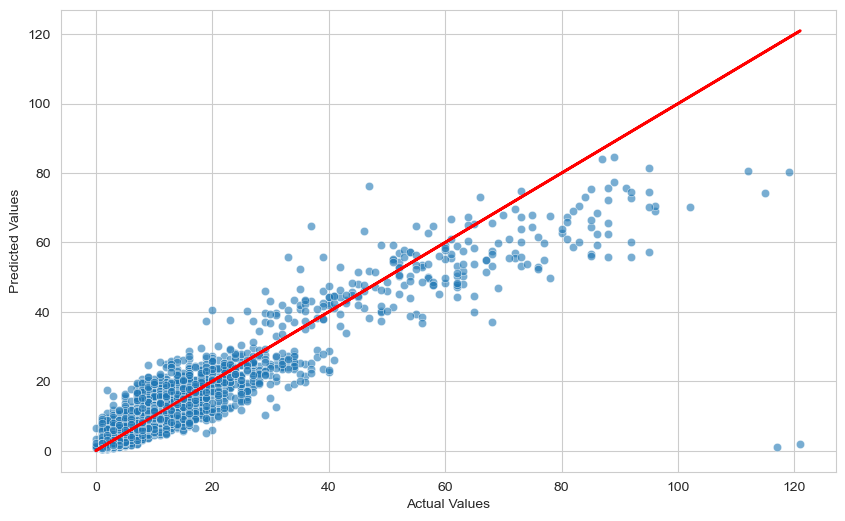

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# تنظیمات اصلی نمودار
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# رسم نمودار پراکنش پیش‌بینی‌ها در مقابل مقادیر واقعی
sns.scatterplot(x=y_test, y=y_pred_combined, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# رسم خط برابری (y=x) برای مقایسه بهتر
plt.plot(y_test, y_test, color='red', linewidth=2)

# نمایش نمودار
plt.show()

In [7]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)


# تعریف مدل XGBoost
params = {
    'objective': 'count:poisson', # برای پواسون رگرسیون
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی با XGBoost
y_pred_xgb = xgb_model.predict(dtest)

# تعریف مدل پواسون رگرسیون با statsmodels
poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson()).fit()

# پیش‌بینی با پواسون رگرسیون
y_pred_poisson = poisson_model.predict(x_test)

# ترکیب پیش‌بینی‌ها
# می‌توانید وزن‌های مختلفی را امتحان کنید یا از یک مدل متا-لرنر استفاده کنید
y_pred_combined = (y_pred_xgb + y_pred_poisson) / 2

from sklearn.metrics import mean_squared_error, mean_absolute_error

# محاسبه خطای میانگین مربعات (MSE) و خطای میانگین مطلق (MAE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_combined))
mae = mean_absolute_error(y_test, y_pred_combined)

print("Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
from sklearn.metrics import r2_score

# محاسبه R²
r2 = r2_score(y_test, y_pred_combined)

print("R² Score:", r2)

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [18:59:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Mean Squared Error (RMSE): 3.619294831644198
Mean Absolute Error (MAE): 2.3295969185709215
R² Score: 0.854691947923693


In [8]:
Adj_r2 = 1 - (1-r2_score(y_test, y_pred_combined)) * (len(y)-1)/(len(y)-X.shape[1]-1)
Adj_r2

0.854240068964202

# CarPngr

In [9]:
filtered_data2 = data[data['CarPngr'] == 1]


In [10]:
target = filtered_data2['Hsptlsns'].shift(-1)


In [11]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import xgboost as xgb


import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd



X = filtered_data2[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]


import statsmodels.api as sm
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd


# تقسیم داده‌ها به آموزش و تست
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

# تعریف مدل XGBoost
params = {
    'objective': 'count:poisson', # برای پواسون رگرسیون
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی با XGBoost
y_pred_xgb = xgb_model.predict(dtest)

# تعریف مدل پواسون رگرسیون با statsmodels
poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson()).fit()

# پیش‌بینی با پواسون رگرسیون
y_pred_poisson = poisson_model.predict(x_test)

# ترکیب پیش‌بینی‌ها
# می‌توانید وزن‌های مختلفی را امتحان کنید یا از یک مدل متا-لرنر استفاده کنید
y_pred_combined = (y_pred_xgb + y_pred_poisson) / 2


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [19:00:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# محاسبه خطای میانگین مربعات (MSE) و خطای میانگین مطلق (MAE)
mse = mean_squared_error(y_test, y_pred_combined)
mae = mean_absolute_error(y_test, y_pred_combined)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
from sklearn.metrics import r2_score

# محاسبه R²
r2 = r2_score(y_test, y_pred_combined)

print("R² Score:", r2)

Mean Squared Error (MSE): 6.32334851934174
Mean Absolute Error (MAE): 1.6184388028302374
R² Score: 0.703467377719271


In [13]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)


# تعریف مدل XGBoost
params = {
    'objective': 'count:poisson', # برای پواسون رگرسیون
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی با XGBoost
y_pred_xgb = xgb_model.predict(dtest)

# تعریف مدل پواسون رگرسیون با statsmodels
poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson()).fit()

# پیش‌بینی با پواسون رگرسیون
y_pred_poisson = poisson_model.predict(x_test)

# ترکیب پیش‌بینی‌ها
# می‌توانید وزن‌های مختلفی را امتحان کنید یا از یک مدل متا-لرنر استفاده کنید
y_pred_combined = (y_pred_xgb + y_pred_poisson) / 2

from sklearn.metrics import mean_squared_error, mean_absolute_error

# محاسبه خطای میانگین مربعات (MSE) و خطای میانگین مطلق (MAE)
mse = mean_squared_error(y_test, y_pred_combined)
mae = mean_absolute_error(y_test, y_pred_combined)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_combined))

print("Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
from sklearn.metrics import r2_score

# محاسبه R²
r2 = r2_score(y_test, y_pred_combined)

print("R² Score:", r2)

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [19:00:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Mean Squared Error (RMSE): 2.1421966357936166
Mean Absolute Error (MAE): 1.4890396889258595
R² Score: 0.6111389068838073


In [14]:
Adj_r2 = 1 - (1-r2_score(y_test, y_pred_combined)) * (len(y)-1)/(len(y)-X.shape[1]-1)
Adj_r2

0.6098479992713175

# Motor

In [15]:
filtered_data3 = data[data['Mtrcyclist'] == 1]
target = filtered_data3['Hsptlsns'].shift(-1)

In [16]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import xgboost as xgb


import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd



X = filtered_data3[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]


import statsmodels.api as sm
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd


# تقسیم داده‌ها به آموزش و تست
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

# تعریف مدل XGBoost
params = {
    'objective': 'count:poisson', # برای پواسون رگرسیون
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی با XGBoost
y_pred_xgb = xgb_model.predict(dtest)

# تعریف مدل پواسون رگرسیون با statsmodels
poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson()).fit()

# پیش‌بینی با پواسون رگرسیون
y_pred_poisson = poisson_model.predict(x_test)

# ترکیب پیش‌بینی‌ها
# می‌توانید وزن‌های مختلفی را امتحان کنید یا از یک مدل متا-لرنر استفاده کنید
y_pred_combined = (y_pred_xgb + y_pred_poisson) / 2


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [19:00:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# محاسبه خطای میانگین مربعات (MSE) و خطای میانگین مطلق (MAE)
mse = mean_squared_error(y_test, y_pred_combined)
mae = mean_absolute_error(y_test, y_pred_combined)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
from sklearn.metrics import r2_score

# محاسبه R²
r2 = r2_score(y_test, y_pred_combined)

print("R² Score:", r2)

Mean Squared Error (MSE): 12.58022726718763
Mean Absolute Error (MAE): 2.1407355245231843
R² Score: 0.9100001632212047


In [18]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)


# تعریف مدل XGBoost
params = {
    'objective': 'count:poisson', # برای پواسون رگرسیون
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی با XGBoost
y_pred_xgb = xgb_model.predict(dtest)

# تعریف مدل پواسون رگرسیون با statsmodels
poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson()).fit()

# پیش‌بینی با پواسون رگرسیون
y_pred_poisson = poisson_model.predict(x_test)

# ترکیب پیش‌بینی‌ها
# می‌توانید وزن‌های مختلفی را امتحان کنید یا از یک مدل متا-لرنر استفاده کنید
y_pred_combined = (y_pred_xgb + y_pred_poisson) / 2

from sklearn.metrics import mean_squared_error, mean_absolute_error

# محاسبه خطای میانگین مربعات (MSE) و خطای میانگین مطلق (MAE)
mse = mean_squared_error(y_test, y_pred_combined)
mae = mean_absolute_error(y_test, y_pred_combined)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_combined))

print("Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
from sklearn.metrics import r2_score

# محاسبه R²
r2 = r2_score(y_test, y_pred_combined)

print("R² Score:", r2)

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [19:00:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Mean Squared Error (RMSE): 3.161791347127049
Mean Absolute Error (MAE): 1.945505519631326
R² Score: 0.8708512970478063


In [19]:
Adj_r2 = 1 - (1-r2_score(y_test, y_pred_combined)) * (len(y)-1)/(len(y)-X.shape[1]-1)
Adj_r2

0.8704010199679623

# Pedal cyclist Regrasion

In [20]:
filtered_data4 = data[data['PdlCyclist'] == 1]
target = filtered_data4['Hsptlsns'].shift(-1)

In [21]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import xgboost as xgb


import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd



X = filtered_data4[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]


import statsmodels.api as sm
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd


# تقسیم داده‌ها به آموزش و تست
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

# تعریف مدل XGBoost
params = {
    'objective': 'count:poisson', # برای پواسون رگرسیون
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی با XGBoost
y_pred_xgb = xgb_model.predict(dtest)

# تعریف مدل پواسون رگرسیون با statsmodels
poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson()).fit()

# پیش‌بینی با پواسون رگرسیون
y_pred_poisson = poisson_model.predict(x_test)

# ترکیب پیش‌بینی‌ها
# می‌توانید وزن‌های مختلفی را امتحان کنید یا از یک مدل متا-لرنر استفاده کنید
y_pred_combined = (y_pred_xgb + y_pred_poisson) / 2


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [19:01:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# محاسبه خطای میانگین مربعات (MSE) و خطای میانگین مطلق (MAE)
mse = mean_squared_error(y_test, y_pred_combined)
mae = mean_absolute_error(y_test, y_pred_combined)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
from sklearn.metrics import r2_score

# محاسبه R²
r2 = r2_score(y_test, y_pred_combined)

print("R² Score:", r2)

Mean Squared Error (MSE): 14.746423593518479
Mean Absolute Error (MAE): 2.1749280461737395
R² Score: 0.8350969598000597


In [23]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)


# تعریف مدل XGBoost
params = {
    'objective': 'count:poisson', # برای پواسون رگرسیون
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی با XGBoost
y_pred_xgb = xgb_model.predict(dtest)

# تعریف مدل پواسون رگرسیون با statsmodels
poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson()).fit()

# پیش‌بینی با پواسون رگرسیون
y_pred_poisson = poisson_model.predict(x_test)

# ترکیب پیش‌بینی‌ها
# می‌توانید وزن‌های مختلفی را امتحان کنید یا از یک مدل متا-لرنر استفاده کنید
y_pred_combined = (y_pred_xgb + y_pred_poisson) / 2

from sklearn.metrics import mean_squared_error, mean_absolute_error

# محاسبه خطای میانگین مربعات (MSE) و خطای میانگین مطلق (MAE)
mse = mean_squared_error(y_test, y_pred_combined)
mae = mean_absolute_error(y_test, y_pred_combined)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_combined))

print("Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
from sklearn.metrics import r2_score

# محاسبه R²
r2 = r2_score(y_test, y_pred_combined)

print("R² Score:", r2)

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [19:01:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Mean Squared Error (RMSE): 3.152567750863845
Mean Absolute Error (MAE): 1.9357875749966325
R² Score: 0.6903496804486589


In [24]:
Adj_r2 = 1 - (1-r2_score(y_test, y_pred_combined)) * (len(y)-1)/(len(y)-X.shape[1]-1)
Adj_r2

0.6893688989605973

# Pedestrian

In [25]:
filtered_data5 = data[data['Pedestrian'] == 1]
target = filtered_data5['Hsptlsns'].shift(-1)

In [26]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import xgboost as xgb


import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd



X = filtered_data5[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]


import statsmodels.api as sm
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd


# تقسیم داده‌ها به آموزش و تست
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

# تعریف مدل XGBoost
params = {
    'objective': 'count:poisson', # برای پواسون رگرسیون
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی با XGBoost
y_pred_xgb = xgb_model.predict(dtest)

# تعریف مدل پواسون رگرسیون با statsmodels
poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson()).fit()

# پیش‌بینی با پواسون رگرسیون
y_pred_poisson = poisson_model.predict(x_test)

# ترکیب پیش‌بینی‌ها
# می‌توانید وزن‌های مختلفی را امتحان کنید یا از یک مدل متا-لرنر استفاده کنید
y_pred_combined = (y_pred_xgb + y_pred_poisson) / 2


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [19:01:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# محاسبه خطای میانگین مربعات (MSE) و خطای میانگین مطلق (MAE)
mse = mean_squared_error(y_test, y_pred_combined)
mae = mean_absolute_error(y_test, y_pred_combined)

print("Mean Squared Error (RMSE):", mse)
print("Mean Absolute Error (MAE):", mae)
from sklearn.metrics import r2_score

# محاسبه R²
r2 = r2_score(y_test, y_pred_combined)

print("R² Score:", r2)

Mean Squared Error (RMSE): 7.173694917540535
Mean Absolute Error (MAE): 1.5528506646226077
R² Score: 0.7286831387048307


In [28]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)


# تعریف مدل XGBoost
params = {
    'objective': 'count:poisson', # برای پواسون رگرسیون
    'eval_metric': 'poisson-nloglik',
    'n_estimators': 500,
    'max_depth': 10,
    'eta': 0.05
}
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# پیش‌بینی با XGBoost
y_pred_xgb = xgb_model.predict(dtest)

# تعریف مدل پواسون رگرسیون با statsmodels
poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson()).fit()

# پیش‌بینی با پواسون رگرسیون
y_pred_poisson = poisson_model.predict(x_test)

# ترکیب پیش‌بینی‌ها
# می‌توانید وزن‌های مختلفی را امتحان کنید یا از یک مدل متا-لرنر استفاده کنید
y_pred_combined = (y_pred_xgb + y_pred_poisson) / 2

from sklearn.metrics import mean_squared_error, mean_absolute_error

# محاسبه خطای میانگین مربعات (MSE) و خطای میانگین مطلق (MAE)
mse = mean_squared_error(y_test, y_pred_combined)
mae = mean_absolute_error(y_test, y_pred_combined)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_combined))

print("Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
from sklearn.metrics import r2_score

# محاسبه R²
r2 = r2_score(y_test, y_pred_combined)

print("R² Score:", r2)

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [19:01:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Mean Squared Error (RMSE): 2.3419114050829473
Mean Absolute Error (MAE): 1.4860520777850585
R² Score: 0.7448533692587529


In [38]:
Adj_r2 = 1 - (1-r2_score(y_test, y_pred_combined)) * (len(y)-1)/(len(y)-X.shape[1]-1)
Adj_r2

0.7432072619636481

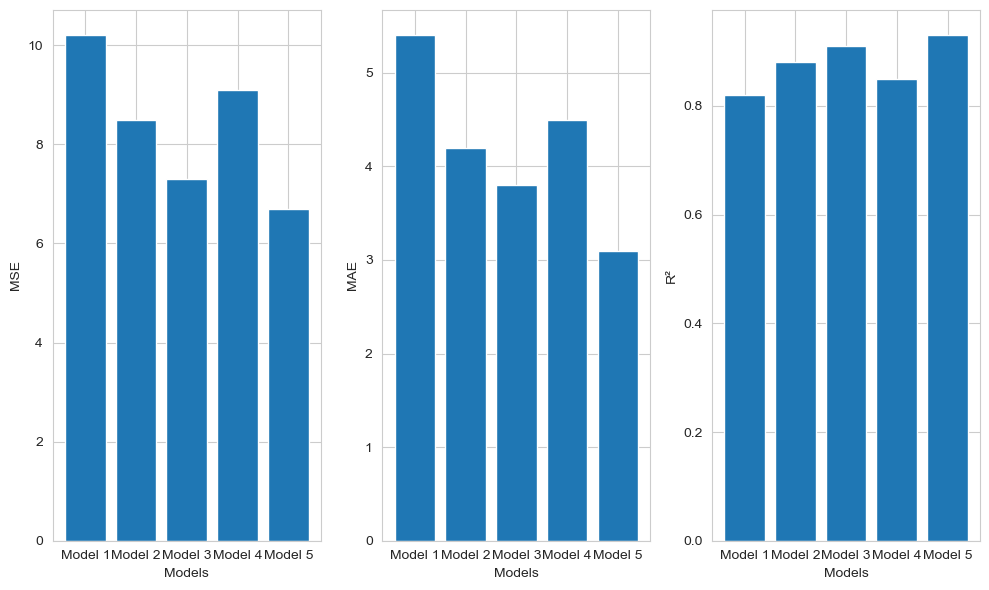

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# فرض کنید که مقادیر MSE، MAE و R² برای هر پنج مدل را دارید
mse_values = [10.2, 8.5, 7.3, 9.1, 6.7]
mae_values = [5.4, 4.2, 3.8, 4.5, 3.1]
r2_values = [0.82, 0.88, 0.91, 0.85, 0.93]

# ایجاد نمودار با ستون‌های چندگانه
plt.figure(figsize=(10, 6))

# نمودار MSE
plt.subplot(1, 3, 1)
plt.bar(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'], mse_values)
plt.xlabel('Models')
plt.ylabel('MSE')

# نمودار MAE
plt.subplot(1, 3, 2)
plt.bar(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'], mae_values)
plt.xlabel('Models')
plt.ylabel('MAE')

# نمودار R²
plt.subplot(1, 3, 3)
plt.bar(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'], r2_values)
plt.xlabel('Models')
plt.ylabel('R²')

plt.tight_layout()
plt.show()

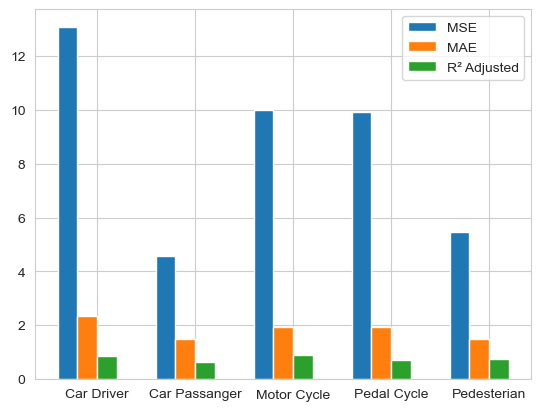

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# تعداد مدل‌ها و معیارها
n_models = 5
n_metrics = 3

# داده‌های تصادفی (جایگزین کنید با داده‌های واقعی شما)
mse_values = [13.09, 4.58, 9.99, 9.93, 5.48]
mae_values = [2.32, 1.48, 1.94, 1.93, 1.48]
r2_values = [0.85, 0.61, 0.87, 0.69, 0.74]

# نام مدل‌ها و معیارها
models = ['Car Driver', ' Car Passanger ', 'Motor Cycle', 'Pedal Cycle', 'Pedesterian']
metrics = ['MSE', 'MAE', 'R² Adjusted']
data = np.array([mse_values, mae_values, r2_values]).T

# رسم نمودار
fig, ax = plt.subplots()

for i in range(n_metrics):
    ax.bar(np.arange(n_models) + i*0.2, data[:, i], width=0.2, label=metrics[i])

ax.set_xticks(np.arange(n_models) + n_metrics*0.2 / 2)
ax.set_xticklabels(models)

ax.legend()

plt.show()

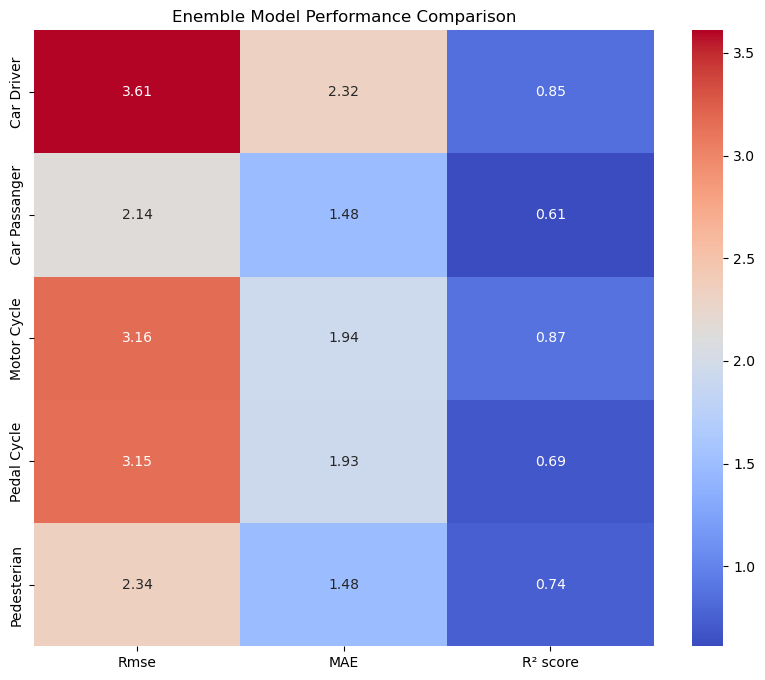

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# فرض کنید که مقادیر MSE، MAE و R² برای هر پنج مدل را دارید
Rmse_values = [3.61, 2.14 , 3.16, 3.15 , 2.34]
mae_values = [2.32, 1.48, 1.94, 1.93, 1.48]
r2_values = [0.85,0.61 ,0.87 ,0.69  ,0.74 ]

# ایجاد داده‌ها برای هیت مپ
metrics = ['Car Driver', ' Car Passanger ', 'Motor Cycle', 'Pedal Cycle', 'Pedesterian']
models = ['Rmse', 'MAE', 'R² score']
data = np.array([Rmse_values, mae_values, r2_values]).T
#metrics
# ایجاد هیت مپ
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(data, annot=True, fmt='.2f', xticklabels=models, yticklabels=metrics, cmap='coolwarm')
heatmap.set_title('Enemble Model Performance Comparison')

plt.show()

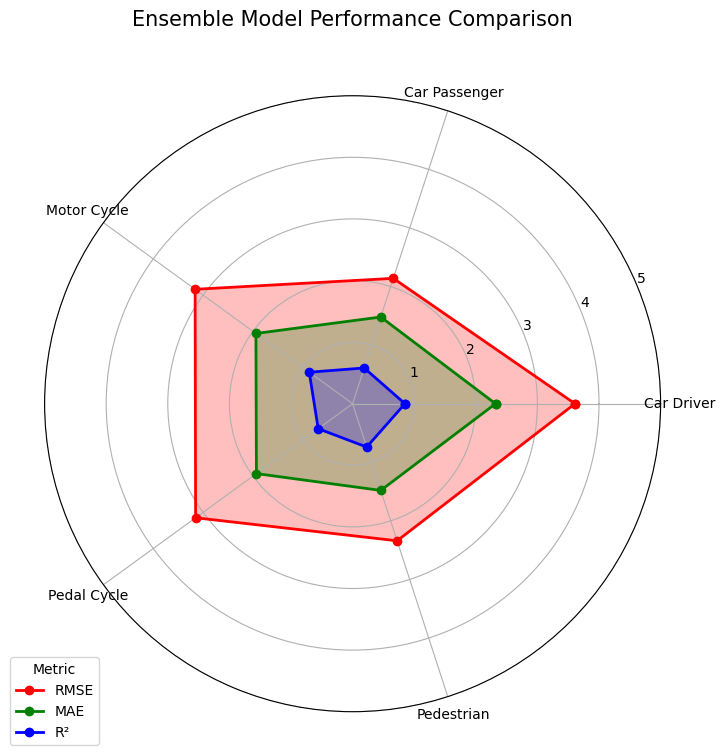

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# مقادیر MSE، MAE و R² برای هر پنج مدل
Rmse_values = [3.61, 2.14 , 3.16, 3.15 , 2.34]
mae_values = [2.32, 1.48 , 1.94, 1.93 , 1.48]
r2_values = [0.85,0.61 ,0.87 ,0.69  ,0.74 ]

# نام مدل‌ها
labels = ['Car Driver', 'Car Passenger', 'Motor Cycle', 'Pedal Cycle', 'Pedestrian']

# ترکیب داده‌ها در یک آرایه
data = np.array([Rmse_values, mae_values, r2_values])

# تعداد متغیرها
num_vars = data.shape[1]

# تقسیم دایره به بخش‌های مساوی
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # بستن دایره

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# رنگ‌ها برای هر معیار
colors = ['red', 'green', 'blue']
labels_metric = ['RMSE', 'MAE', 'R²']

for idx, (data_slice, color, label) in enumerate(zip(data, colors, labels_metric)):
    data_slice = np.concatenate([data_slice, [data_slice[0]]])  # بستن دایره
    ax.plot(angles, data_slice, 'o-', linewidth=2, label=label, color=color)
    ax.fill(angles, data_slice, alpha=0.25, color=color)

ax.set_xticks(angles[:-1])  # تنظیم موقعیت برچسب‌ها
ax.set_xticklabels(labels)
ax.set_yticks([1, 2, 3, 4, 5])  # تنظیم مقیاس محور y
ax.set_yticklabels(['1', '2', '3', '4', '5'])

plt.title('Ensemble Model Performance Comparison', size=15, color='black', y=1.1)
plt.legend(title='Metric', loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()